In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from functools import reduce

statesofInterest = ['IOWA', 'INDIANA', 'ILLINOIS', 'KANSAS', 'MINNESOTA', 'MISSOURI', 'NEBRASKA', 'NORTH DAKOTA', 'SOUTH DAKOTA', 'OHIO']

In [2]:
hd1 = ["identifier", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
precip  = pd.read_csv("weatherData/precipState2",  names=hd1, sep='\s+', dtype="str")
minTemp = pd.read_csv("weatherData/minTempState2", names=hd1, sep='\s+', dtype="str")
maxTemp = pd.read_csv("weatherData/maxTempState2", names=hd1, sep='\s+', dtype="str")
states  = pd.read_csv("weatherData/StatesCode.csv", names=["stateCode" , "State"], dtype="str")

In [3]:
precip.head()
minTemp.head()
#maxTemp.head()


,identifier,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0010281895,33.40,26.80,42.40,51.20,58.40,66.50,68.80,69.30,66.40,45.20,41.40,32.70
1,0010281896,34.00,36.40,41.20,55.60,63.90,66.90,70.70,70.40,62.60,50.60,45.80,35.10
2,0010281897,31.40,41.20,50.40,50.10,55.90,68.30,70.20,68.10,62.50,53.10,41.40,36.90
3,0010281898,38.80,34.20,48.50,46.40,60.20,68.00,69.60,69.20,65.10,49.60,38.70,32.50
4,0010281899,33.10,28.60,43.50,50.80,63.60,67.60,68.90,69.90,59.40,54.00,42.80,33.80


In [4]:
def weatherData(states, feature1, state1, month1, featureName):
        st1 = states[states["State"] == state1]["stateCode"].astype(str)
        ident1  = feature1["identifier"].astype(str)
        subset1 = feature1[ident1.str.startswith(st1.iloc[0], na=False)]
        temp1   = subset1[month1]
        year1   = subset1["identifier"].str.strip().str[-4:]    
     
        return(pd.DataFrame({"year": year1.T, "state": state1, featureName + "_" + month1: temp1.T}))                              

In [5]:
# loop over months per state        
                            
mnt1 = ["jul", "aug", "sep", "oct"]    
Iowa1 = [] 
    
for i in mnt1:
    dt1 = weatherData(states, minTemp, "Iowa", i, "minTemp")                                           
    Iowa1.append(dt1)
 

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='inner', suffixes=(None, "_u")), Iowa1)
df_merged.drop(["state_u"], axis = 1, inplace=True)   


Iowa_minTemp = df_merged[["year", "state", "minTemp_aug", "minTemp_sep", "minTemp_oct"]]
Iowa_minTemp.replace(-99.90, np.nan, inplace=True)
Iowa_minTemp.to_csv("Iowa_minTemp.csv", index = False)
                                  

/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [552]:
# loop over months per state        
                            
mnt1 = ["jul", "aug", "sep", "oct"]    
Iowa1 = [] 
    
for i in mnt1:
    dt1 = weatherData(states, maxTemp, "Iowa", i, "maxTemp")                                           
    Iowa1.append(dt1)
    
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='inner', suffixes=(None, "_u")), Iowa1)
df_merged.drop(["state_u"], axis = 1, inplace=True)   

Iowa_maxTemp = df_merged[["year", "state", "maxTemp_aug", "maxTemp_sep", "maxTemp_oct"]]
Iowa_maxTemp.replace('-99.90', np.nan,  inplace=True)

/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


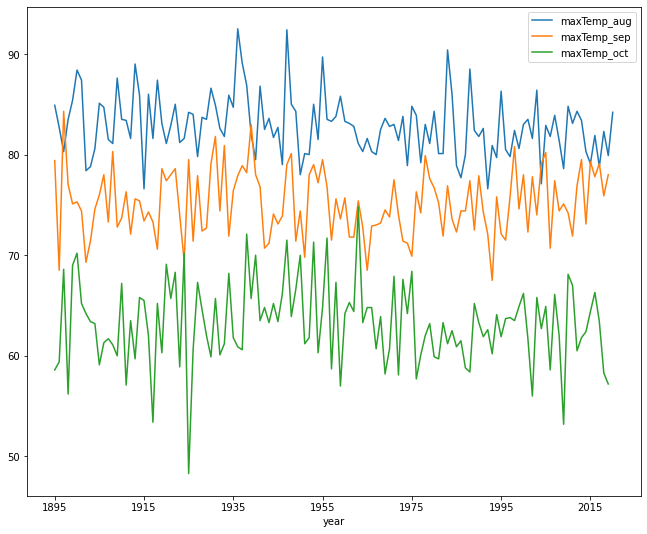

In [553]:
Iowa_maxTemp.to_csv("Iowa_maxTemp.csv", index = False)
Iowa_maxTemp.set_index('year', inplace=True)
Iowa_maxTemp.drop("state", axis=1, inplace=True)
Iowa_maxTemp[["maxTemp_aug", "maxTemp_sep", "maxTemp_oct"]] = Iowa_maxTemp[["maxTemp_aug", "maxTemp_sep", "maxTemp_oct"]].astype(float)
Iowa_maxTemp.plot(figsize=(11, 9))

In [554]:
# Import all states
allStates = states["State"]
      
mnt1 = ["jul","aug", "sep", "oct"]    
states1 = allStates
allStates_maxTemp = []

for j in states1:
    perState = []
    for i in mnt1:
        dt1 = weatherData(states, maxTemp, j, i, "maxTemp")                                           
        perState.append(dt1)
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='inner', suffixes=(None, "_u")), perState)
    allStates_maxTemp.append(df_merged)
    
allStates_maxTemp1 = pd.concat(allStates_maxTemp)
allStates_maxTemp1
allStates_maxTemp1.drop(["state_u"], axis = 1, inplace=True) 

allStates_maxTemp1.replace('-99.90', np.nan,  inplace=True)
allStates_maxTemp1.to_csv("allStates_maxTemp1.csv", index = False)
allStates_maxTemp1.head(10)

,year,state,maxTemp_jul,maxTemp_aug,maxTemp_sep,maxTemp_oct
0,1895,Alabama,89.60,89.70,89.10,74.20
1,1896,Alabama,91.60,94.00,89.20,75.80
2,1897,Alabama,92.80,89.50,88.70,81.00
3,1898,Alabama,90.50,88.40,85.40,72.30
4,1899,Alabama,91.90,92.00,86.30,78.10
5,1900,Alabama,90.60,93.50,89.10,78.20
6,1901,Alabama,95.10,89.60,83.70,76.20
7,1902,Alabama,96.10,94.60,84.80,75.60
8,1903,Alabama,92.00,91.80,86.70,77.00
9,1904,Alabama,90.60,89.60,90.30,80.10


In [555]:
# Import all states
allStates = states["State"]
      
mnt1 = ["jul", "aug", "sep", "oct"]    
states1 = allStates
allStates_minTemp = []

for j in states1:
    perState = []
    for i in mnt1:
        dt1 = weatherData(states, maxTemp, j, i, "minTemp")                                           
        perState.append(dt1)
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='inner', suffixes=(None, "_u")), perState)
    allStates_minTemp.append(df_merged)
    
    
allStates_minTemp1 = pd.concat(allStates_minTemp)
allStates_minTemp1.drop(["state_u"], axis = 1, inplace=True)   
allStates_minTemp1.replace('-99.90', np.nan,  inplace=True)
allStates_minTemp1.to_csv("allStates_minTemp1.csv", index = False)
allStates_minTemp1.head(10)

,year,state,minTemp_jul,minTemp_aug,minTemp_sep,minTemp_oct
0,1895,Alabama,89.60,89.70,89.10,74.20
1,1896,Alabama,91.60,94.00,89.20,75.80
2,1897,Alabama,92.80,89.50,88.70,81.00
3,1898,Alabama,90.50,88.40,85.40,72.30
4,1899,Alabama,91.90,92.00,86.30,78.10
5,1900,Alabama,90.60,93.50,89.10,78.20
6,1901,Alabama,95.10,89.60,83.70,76.20
7,1902,Alabama,96.10,94.60,84.80,75.60
8,1903,Alabama,92.00,91.80,86.70,77.00
9,1904,Alabama,90.60,89.60,90.30,80.10


/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


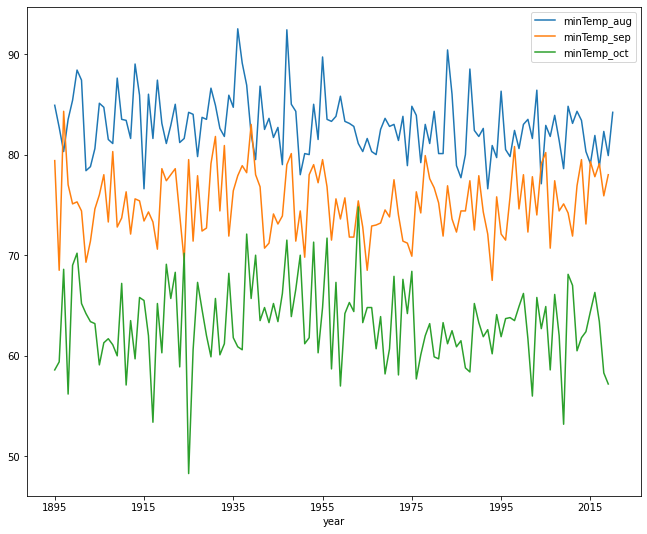

In [556]:
Iowa_minTemp = allStates_minTemp1[allStates_minTemp1["state"]== "Iowa"]
Iowa_minTemp.set_index('year', inplace=True)

Iowa_minTemp.drop("state", axis=1, inplace=True)
Iowa_minTemp
Iowa_minTemp[["minTemp_aug", "minTemp_sep", "minTemp_oct"]] = Iowa_minTemp[["minTemp_aug", "minTemp_sep", "minTemp_oct"]].astype(float)
Iowa_minTemp.plot(figsize=(11, 9))

In [557]:
# Import all states
allStates = states["State"]
      
mnt1 = ["jun", "jul","aug", "sep", "oct"]    
states1 = allStates
allStates_precip = []

for j in states1:
    perState = []
    for i in mnt1:
        dt1 = weatherData(states, precip, j, i, "precip")                                           
        perState.append(dt1)
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='inner', suffixes=(None, "_u")), perState)
    allStates_precip.append(df_merged)
    
allStates_precip = pd.concat(allStates_precip)
allStates_precip.drop(["state_u"], axis = 1, inplace=True)   
allStates_precip.replace('-99.90', np.nan,  inplace=True)
allStates_precip.to_csv("allStates_precip.csv", index = False)
allStates_precip.head(10)

,year,state,precip_jun,precip_jul,precip_aug,precip_sep,precip_oct
0,1895,Alabama,5.79,4.51,5.13,1.60,2.22
1,1896,Alabama,5.44,4.99,2.82,1.80,2.27
2,1897,Alabama,1.97,4.72,6.07,0.75,1.26
3,1898,Alabama,3.86,6.05,7.20,3.46,3.84
4,1899,Alabama,2.91,6.73,3.86,0.53,2.64
5,1900,Alabama,10.38,4.74,3.12,4.06,5.79
6,1901,Alabama,3.25,3.49,9.12,4.49,1.22
7,1902,Alabama,1.35,2.87,3.77,4.22,3.63
8,1903,Alabama,4.75,4.39,4.57,1.58,1.95
9,1904,Alabama,3.22,5.01,5.81,1.23,0.26


/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/jeff001/python36/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

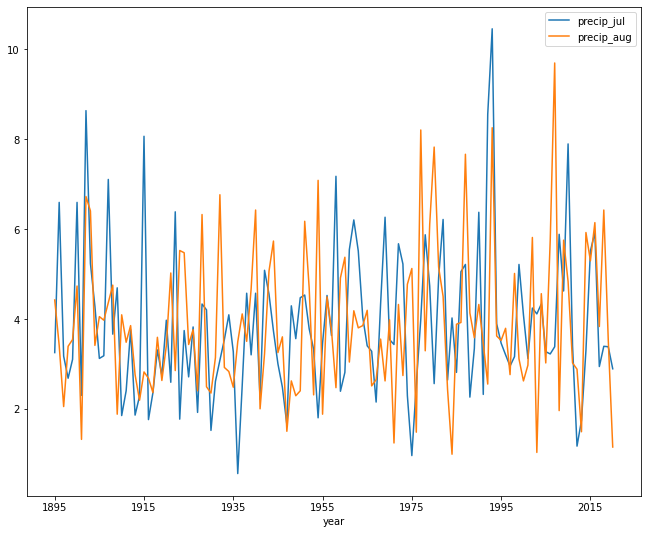

In [558]:
Iowa_precip = allStates_precip[allStates_precip["state"]== "Iowa"]
Iowa_precip.set_index('year', inplace=True)
Iowa_precip.drop("state", axis=1, inplace=True)
#Iowa_precip[["precip_jul", "precip_aug", "precip_sep", "precip_oct"]] = Iowa_precip[["precip_jul", "precip_aug", "precip_sep", "precip_oct"]].astype(float)
Iowa_precip[["precip_jul", "precip_aug"]] = Iowa_precip[["precip_jul", "precip_aug"]].astype(float)
Iowa_precip.replace(-9.99, np.nan, inplace=True)
Iowa_precip.plot(figsize=(11, 9))

In [559]:
Iowa_precip

,precip_jun,precip_jul,precip_aug,precip_sep,precip_oct
year,,,,,
1895,4.18,3.25,4.42,3.12,0.48
1896,3.27,6.59,3.41,3.97,3.21
1897,3.90,3.17,2.05,1.97,1.02
1898,4.40,2.68,3.39,2.62,3.58
1899,5.17,3.10,3.54,0.96,1.83
...,...,...,...,...,...
2016,3.70,5.92,6.14,6.12,2.01
2017,3.50,2.94,3.83,2.31,5.26
2018,7.55,3.39,6.42,8.10,4.63


In [560]:
allStates_precip['state'] = allStates_precip['state'].str.upper() 
model_allStates_precip = allStates_precip[allStates_precip['state'].isin(statesofInterest)]
model_allStates_precip = model_allStates_precip[["year", "state", "precip_jul", "precip_aug", "precip_sep", "precip_oct"]]
model_allStates_precip.columns = model_allStates_precip.columns.str.title()
model_allStates_precip.to_csv("data_model_ready/model_allStates_precip.csv", index=False)

allStates_minTemp1['state'] = allStates_minTemp1['state'].str.upper() 
model_allStates_minTemp1 = allStates_minTemp1[allStates_minTemp1['state'].isin(statesofInterest)]
model_allStates_minTemp1 = model_allStates_minTemp1[["year", "state", "minTemp_jul", "minTemp_aug", "minTemp_sep", "minTemp_oct"]]
model_allStates_minTemp1.columns = model_allStates_minTemp1.columns.str.title()
model_allStates_minTemp1.to_csv("data_model_ready/model_allStates_minTemp1.csv", index=False)

allStates_maxTemp1['state'] = allStates_maxTemp1['state'].str.upper() 
model_allStates_maxTemp1 = allStates_maxTemp1[allStates_maxTemp1['state'].isin(statesofInterest)]
model_allStates_maxTemp1 = model_allStates_maxTemp1[["year", "state", "maxTemp_jul", "maxTemp_aug", "maxTemp_sep", "maxTemp_oct"]]
model_allStates_maxTemp1.columns = model_allStates_maxTemp1.columns.str.title()
model_allStates_maxTemp1.to_csv("data_model_ready/model_allStates_maxTemp1.csv", index=False)
